# <font color="blue"> MBA em Ciência de Dados</font>
# <font color="blue">Técnicas Avançadas para Captura e Tratamento de Dados</font>

## <font color="blue">Identificação e Extração de Texto</font>
    
## <font color="blue">Solução dos Exercícios</font>

**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

<font color='red'> Recomendamos fortemente resolver os exercícios sem consultar as soluções antecipadamente </font>

Os exercícios a seguir farão uso dos seguintes aquivos, disponíveis para download no Moodle:

-<font style="font-family: monaco"> pdf_exercicios.pdf</font><br>
-<font style="font-family: monaco"> cupom_fiscal1.png </font><br>
-<font style="font-family: monaco"> cupom_fiscal2.png </font><br>
-<font style="font-family: monaco"> nfe-example.pdf</font>

### Exercício 1)
Arquivos PDF tipicamente possuem diversas páginas. O processo de extração do conteúdo textual de cada página consiste de duas etapas principais:
1. Conversão das páginas pdf em imagens
2. Extração do texto a partir das imagens das páginas.

A fim de faciliar a etapa 2, recomenda-se salvar as imagens das páginas em um diretório que contenha apenas as imagens geradas a partir das páginas. Escreva uma função em Python que receba como atributo o nome de um arquivo PDF e crie um diretório com o mesmo nome do arquivo seguido pela palavra "\_imagens". Por exemplo, se o arquivo PDF for chamado `meu_arquivo.pdf`, o diretório criado deverá ser `meu_arquivo_imagens`.

A função deve verificar se o diretório já existe. Se não existir, deve criá-lo. Se o diretório já existe, então todos os arquivos contidos no 
diretório devem ser removidos para que o diretório se torne vazio.

**Dica**: Utilize os métodos <font color='blue'>os.path.exists</font>, <font color='blue'>os.makedirs</font> e <font color='blue'>os.remove</font> do pacote <font color='blue'>os</font> combinados com o método <font color='blue'>glob.glob</font> do pacote <font color='blue'>glob</font>.

In [1]:
import os
import glob

def create_image_dir(filename):
    name = filename.split('.')[0]
    dir_name = name+'_imagens'
    if not os.path.exists(dir_name):  # verificando se o diretório existe
        os.makedirs(dir_name)      
    else:
        files = glob.glob(dir_name+'/*') # removendo arquivos do
        for f in files:                  # diretório caso ele já exista
            os.remove(f)
            
    return(dir_name)
    
create_image_dir('testando arquivo.pdf')

'testando arquivo_imagens'

### Exercício 2)
Converta cada página do arquivo <font style="font-family: monaco"> pdf_exercicios.pdf</font> em uma imagem, utilizando a função criada no exercício 1) para criar um diretório e armazenar as imagens geradas no diretório criado.

In [2]:
from pdf2image import convert_from_path 

filename = 'pdf_exercicios.pdf'
diretorio = create_image_dir(filename)

imagem_paginas = convert_from_path(filename)

for i,pagina in enumerate(imagem_paginas): 
    image_name = diretorio + "/pagina_"+str(i)+".png"  # nome do arquivo da imagem
      
    # Salavando a imagen da página em um arquivo
    print('Gravando pagina: ',image_name)
    pagina.save(image_name, 'PNG') 

Gravando pagina:  pdf_exercicios_imagens/pagina_0.png
Gravando pagina:  pdf_exercicios_imagens/pagina_1.png
Gravando pagina:  pdf_exercicios_imagens/pagina_2.png


### Exercício 3)
Utilize o pacote <font color='blue'>PIL</font> combinado com <font color='blue'>matplotlib</font> para exibir todas as imagens criadas.

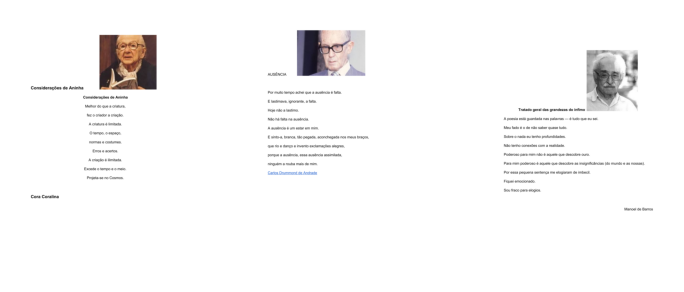

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

files = glob.glob(diretorio+'/*') # obtendo os nomes das imagens
n = len(files)                    # quantidade de imagens

fig,ax = plt.subplots(1,n)    # montando um subplot para cada imagem
fig.set_size_inches(12, 6)
for i,f in enumerate(files):
    image = Image.open(f)
    ax[i].axis('off')
    ax[i].imshow(image) 

### Exercício 4)
Aplique o OCR em cada imagem das páginas do arquivo <font style="font-family: monaco"> pdf_exercicios.pdf</font>. Armazene o texto de cada página em um dicionário onde a chave é o número da página e o valor a string extraída da página.  

In [4]:
import pytesseract as ocr
from PIL import Image
import glob 

files = glob.glob(diretorio+'/*')

dpaginas = {}
for f in files:
     # como o glob nao retorna os arquivos 
     # ordenados de acordo com as pagina
     # precisamos pegar o número da pagina
     # a partir do nome do arquivo
    page_number = int(f.split('.')[0][-1]) # número da página
    dpaginas[page_number] = ocr.image_to_string(Image.open(f), lang='por')

print(dpaginas.keys())

dict_keys([1, 0, 2])


### Exercício 5)
Cada página do arquivo <font style="font-family: monaco"> pdf_exercicios.pdf</font> corresponde a um poema cujo nome do autor aparece logo abaixo do texto do poema. Encontre o nome dos autores de cada um dos peomas e armazene-os em uma lista.

In [5]:
# Para encontrar o nome do autor temos que fazer algumas suposições 
# Neste caso iremos supor que o nome do autor corresponde a última sequência de
# carateres alfa-numéricos da string detectada pelo OCR que é precedida por uma
# quebra de linha ('\n'). 
# Desta forma, percorremos cada string em sentido reverso até encontrar
# o primeiro caractere alfa-numérico e então extraímos os caracteres até que 
# uma quebra de linha seja encontrada.

autores = []
for k,v in dpaginas.items():
    i = -1
    while(not v[i].isalpha()):   # encontra o primeiro caracter alfa-numérico no sentido reverso
        i = i - 1                # da string. A variável i indica onde este caracter está
    autor = ''
    while(v[i]!='\n'):           # extrai todos os caracteres até que uma quebra de linha 
        autor += v[i]            # seja encontrada
        i = i - 1
    autores.append(autor[::-1])  # armazena o nome do autor em uma lista
    
print(autores)

['Cora Coralina', 'Carlos Drummond de Andrade', 'Manoel de Barros']


In [19]:
# Solução usando Regex
import re

autores = []
for k,v in dpaginas.items():
    v = v[::-1]     # reverte a ordem da string (só para faciliar)
    m = re.search('[a-zA-Z]', v)         # encontra a posição do primeiro caracter válido
    n = re.search('[\n]', v[m.start():]) # encontra o primeiro símbolo de quebra de linha 
                                         # após a seq. de caracteres
    autores.append(v[m.start():n.start()+2][::-1])  # o método start retorna a posição 
                                                    # retornada pela busca. O +2 no comando
                                                    # n.start()+2 é necessário pois a busca
                                                    # retorna a posição do '\n' e o caractere
                                                    # do inicio do nome está duas posições a frente
    
print(autores)

['Cora Coralina', 'Carlos Drummond de Andrade', 'Manoel de Barros']


### Exercício 6)
Encontre qual a página que corresponde ao poema de Cora Coralina e imprima o texto todo.

In [8]:
for k,v in dpaginas.items():
    if 'Cora Coralina' in v:
        print(v)

 

Considerações de Aninha
Considerações de Aninha
Melhor do que a criatura,
fez o criador a criação.
A criatura é limitada.
O tempo, o espaço,
normas e costumes.
Erros e acertos.
A criação é ilimitada.
Excede o tempo e o meio.

Projeta-se no Cosmos.

Cora Coralina



### Exercício 7)
Os arquivos <font style="font-family: monaco"> cupom-fiscal1.png </font>  e <font style="font-family: monaco"> cupom-fiscal2.png </font> correspondem a imagens de cupons fiscais. Aplicando OCR, extraia o texto contido nas imagens e armazene em variáveis do tipo string.

In [9]:
import pytesseract as ocr
from PIL import Image

text_cupom1 = ocr.image_to_string(Image.open('cupom-fiscal1.png'), lang='por')
text_cupom2 = ocr.image_to_string(Image.open('cupom-fiscal2.png'), lang='por')
print(text_cupom1)
print(5*'--')
print(text_cupom2)

22/05/2013 15:11:33 CCF:000012 oo: 000022

CUPOM FISCAL

ITEM CópIGO DESCRIÇÃO
QTD. UM VL UNI Ré st vwL ITEM RS
1 E CAMISA BRASIL 15UN X 10,00 I1 150,00
TOTAL R$ 150,00
Dinheizo 150,00

LojaFacil v5.0
Val. Aprox. dos Tributos: R$48,14 (32,098) (IBPT)

ACE1Z4  2CDAE4  SSEISB  ISDSAS  SCECZA  21C521
EPSON TM-TEI EBII
ECE-IF VERSÃO:01.03.00 ECF:001 LJsLJ01
cecececececoanrace 22/05/2013 15:11:40
FAB: EPMMO40OOOO000000001

   

----------
METALNOX INDÚSTRIA METALÚRGICA LTDA
RUA JOSÉ THEODORO RIBEIRO - 3571, ILHA DA FIGUEIRA
CEP: 89.258-001 JARAGUÁ DO SUL, SC

CNPJ; 78.810.975/0001-72
TE: XXX XKXXXX

20/06/2015 11:55:23 CCF: 012249 COD: 020990
CNPJICPF consumidor: 754.523,157-05
NOME: JOÃO DOS SANTOS
END: RUA GETÚLIO VARGAS, 449 - SÃO PAULO
CUPOM FISCAL

ITEM CÓDIGO DESCRIÇÃO QTD UN VLUNIT(RS) ST VL ITEMIRS)

001 1955 PONTEIRAPARAPER 204250 TI700% 50,00
001 1875  RODIZIOSFAZMM 204280  T1700% 56,00
TOTAL R$ 106,00
Dinheiro 150,00
TROCO 44,00
Vendedor: 000008 000213946-01 - CX 1 -SIP-
Valor t

### Exercício 8)
Utilize o pacote <font color='blue'> re </font> para identificar nas strings extraídas dos cupons ficais do exercício 7), todos os valores que possam estar relacionados com preços, ou seja, sequências de dígitos numéricos que precedam uma virgula, seguido de **exatamente dois** dígitos depois da vírgula. Por exemplo, quando aplicado à string, 
```python
'754.523,157-05 1050,00 FAZMM 204280 (32,098) R$48,14'
```
o processo deve resultar em:
```python
['1050,00 ', '48,14']
```


In [10]:
import re

texto = '754.523,157-05 1050,00 FAZMM 204280 (32,098) R$48,14'

print(re.findall('[\d]+,[\d]{2}\s+|[\d]+,[\d]{2}$',texto))
# a busca demanda duas opcoes [\d]+,[\d]{2}\s+ ou [\d]+,[\d]{2}$
# o simbolo '|' corresponde ao 'ou' 
# o simbolo {2} força apenas dois digitos depois da vírgula 
# o simbolo \s garante que depois dos dois digitos não existem caracteres,
# apenas espaço em branco, tabular ou quebra de linha
# o simbolo $ admite final da string

['1050,00 ', '48,14']


In [11]:
print(text_cupom1)
print('\n'+5*'--'+'Valores Identificados'+5*'--')
print(re.findall('[\d]+,[\d]{2}\s+|[\d]+,[\d]{2}$',text_cupom1))

22/05/2013 15:11:33 CCF:000012 oo: 000022

CUPOM FISCAL

ITEM CópIGO DESCRIÇÃO
QTD. UM VL UNI Ré st vwL ITEM RS
1 E CAMISA BRASIL 15UN X 10,00 I1 150,00
TOTAL R$ 150,00
Dinheizo 150,00

LojaFacil v5.0
Val. Aprox. dos Tributos: R$48,14 (32,098) (IBPT)

ACE1Z4  2CDAE4  SSEISB  ISDSAS  SCECZA  21C521
EPSON TM-TEI EBII
ECE-IF VERSÃO:01.03.00 ECF:001 LJsLJ01
cecececececoanrace 22/05/2013 15:11:40
FAB: EPMMO40OOOO000000001

   


----------Valores Identificados----------
['10,00 ', '150,00\n', '150,00\n', '150,00\n\n', '48,14 ']


In [12]:
print(text_cupom2)
print('\n'+5*'--'+'Valores Identificados'+5*'--')
print(re.findall('[\d]+,[\d]{2}\s+|[\d]+,[\d]{2}$',text_cupom2))

METALNOX INDÚSTRIA METALÚRGICA LTDA
RUA JOSÉ THEODORO RIBEIRO - 3571, ILHA DA FIGUEIRA
CEP: 89.258-001 JARAGUÁ DO SUL, SC

CNPJ; 78.810.975/0001-72
TE: XXX XKXXXX

20/06/2015 11:55:23 CCF: 012249 COD: 020990
CNPJICPF consumidor: 754.523,157-05
NOME: JOÃO DOS SANTOS
END: RUA GETÚLIO VARGAS, 449 - SÃO PAULO
CUPOM FISCAL

ITEM CÓDIGO DESCRIÇÃO QTD UN VLUNIT(RS) ST VL ITEMIRS)

001 1955 PONTEIRAPARAPER 204250 TI700% 50,00
001 1875  RODIZIOSFAZMM 204280  T1700% 56,00
TOTAL R$ 106,00
Dinheiro 150,00
TROCO 44,00
Vendedor: 000008 000213946-01 - CX 1 -SIP-
Valor trib. aprox. [Fed= 0,44] [Est= 0,50)

Fonte: IBPIFECOMERCIO SP 9013aC
BR


----------Valores Identificados----------
['50,00\n', '56,00\n', '106,00\n', '150,00\n', '44,00\n']


### Exercício 9)
Extraia o texto contido no arquivo <font style="font-family: monaco"> nfe-example.pdf</font>. Você deve extrair primeiro a imagem da página (o PDF contém apenas uma página), armazenando a imagem em um arquivo. 

In [13]:
from pdf2image import convert_from_path 
import pytesseract as ocr
from PIL import Image

filename = 'nfe-example.pdf'

nfe_imagem = convert_from_path(filename)

for i,pagina in enumerate(nfe_imagem): 
    # Salavando a imagen da página em um arquivo
    pagina.save('nfe-example.png', 'PNG') 

text_nfe = ocr.image_to_string(Image.open('nfe-example.png'), lang='por')

In [14]:
print(text_nfe)

 

 

SERVIÇOS CONSTANTES DA NOTA FISCAL INDICADO AO LADO

 

DATA DE RECEBIMENTO

 

IDENTIFICAÇÃO E ASSINATURA DO RECEBEDOR

 

NF-e

Nº 00000
SÉRIE 001

 

 

 

IDENTIFICAÇÃO DO EMITENTE

DANFE

DOCUMENTO AUXILIAR DA
NOTA FISCAL ELETRÔNICA

 

0 - ENTRADA 1
1- SAÍDA

 

 

 

CHAVE DE ACESSO

 

 

SÉRIE 001

Nº 000006334 FL. 1 /1

Consulta de autenticidade no portal nacional da NF-e
www nfe fazenda gov br/portal

ou no site da Sefaz Autorizadora

 

NATUREZA DE OPERAÇÃO
Simples remessa de transporte

 

PROTOCOLO DE AUTORIZAÇÃO DE USO

 

 

 

 

 

 

 

 

 

 

 

TNSCRIÇÃO ESTADUAL INSCRIÇÃO ESTADUAL DO SUBST. TRIB. CNPITCPE

DESTINATÁRIO / REMETENTE

NOME | RAZÃO SOCIAL CNPJ/CPF DATA DA EMISSÃO

14/02/2020

ENDEREÇO BAIRRO / DISTRITO TER DATA SAIDA [ENTRADA
PARQUE ARNOLD SCHIMIDT 17256111 | 14/02/2020

MUNICÍPIO FONE / FAX UF INSCRIÇÃO ESTADUAL HORA DA SAÍDA

SAO CARLOS -(16) 5533-5353 SP 08:21:36

 

INFORMAÇÕES DO LOCAL DE RETIRADA

 

NOME / RAZÃO SOCIAL,

 

 

 

 

 



### Exercício 10)
Escreva uma expressão regular para encontrar todos os valores monetários do texto extraido (por exemplo: xx.xxx,xx ou xxx,xx). Converta os valores encontrados de _string_ para _float_ e some todos os valores.

In [15]:
import re

expreg = '[\d]+\.\d\d\d,\d\d|[\d]+,\d\d'

valores = re.findall(expreg,text_nfe)
print(valores)

['0,00', '0,00', '0,00', '0,00', '4.373,49', '100,00', '0,00', '0,00', '0,00', '1,00', '1.377,69', '1.377,69', '0,00', '0,00', '0,00', '0,00', '0,00', '0,00', '1,00', '1.826,92', '1.826,92', '0,00', '0,00', '0,00', '0,00', '0,00', '0,00', '1,00', '1.168,88', '1.168,88', '0,00', '0,00', '0,00', '0,00', '0,00', '0,00']


In [18]:
# convertendo para float

# removendo espacos em branco, \n, \t, etc
print('Removendo espaço em branco, quebra de linha, tabulações, etc..')
float_list = [''.join(s.split()) for s in valores] 
print(float_list)

# removendo '.' e substituindo ',' por '.' 
print("\nRemovendo '.' e substituindo ',' por '.' ")
float_list = [s.replace('.','').replace(',','.') for s in float_list] 
print(float_list)

# convertendo para float e somando
print("\nConvertendo para float")
float_list = [float(s) for s in float_list] 
print(float_list)
print('\nSoma total: ',sum(float_list))

Removendo espaço em branco, quebra de linha, tabulações, etc..
['0,00', '0,00', '0,00', '0,00', '4.373,49', '100,00', '0,00', '0,00', '0,00', '1.377,69', '1.377,69', '0,00', '0,00', '0,00', '0,00', '1.826,92', '1.826,92', '0,00', '0,00', '0,00', '0,00', '1.168,88', '1.168,88', '0,00', '0,00', '0,00', '0,00']

Removendo '.' e substituindo ',' por '.' 
['0.00', '0.00', '0.00', '0.00', '4373.49', '100.00', '0.00', '0.00', '0.00', '1377.69', '1377.69', '0.00', '0.00', '0.00', '0.00', '1826.92', '1826.92', '0.00', '0.00', '0.00', '0.00', '1168.88', '1168.88', '0.00', '0.00', '0.00', '0.00']

Convertendo para float
[0.0, 0.0, 0.0, 0.0, 4373.49, 100.0, 0.0, 0.0, 0.0, 1377.69, 1377.69, 0.0, 0.0, 0.0, 0.0, 1826.92, 1826.92, 0.0, 0.0, 0.0, 0.0, 1168.88, 1168.88, 0.0, 0.0, 0.0, 0.0]

Soma total:  13220.470000000001
